In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/medquad.csv.zip')

# Display the first few rows of the DataFrame to check if it's loaded correctly
print(df.head())

# Checking for missing values in each section
print(df.isnull().sum())

# Summary of the data
print(df.info())


                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area  
0   Glaucoma  
1   Glaucoma  
2   Glaucoma  
3   Glaucoma  
4   Glaucoma  
question       0
answer         5
source         0
focus_area    14
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column

In [10]:
# Ensure that your dataset has at least 5000 rows to remove
if len(df) < 5000:
    raise ValueError("The dataset does not have enough rows to delete 5000 rows.")

# Randomly select 5000 rows
rows_to_delete = df.sample(n=5000, random_state=42).index

# Drop the selected rows from the dataset
df = df.drop(rows_to_delete)

# Save the modified dataset to a new CSV file or overwrite the existing one
df.to_csv('medquad_modified.csv', index=False)

# Verify that the rows were removed
print(f"Number of rows after deletion: {len(df)}")

Number of rows after deletion: 11412


In [11]:
from collections import Counter
import re

# Convert non-string entries to empty strings
df['answer'] = df['answer'].astype(str)

# Combine all answers into a single text block
all_text = " ".join(df['answer'])

# Clean the text and split into words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words (excluding common stopwords if necessary)
most_common_words = word_freq.most_common(20)

# Display the most common words
print("Most Common Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Common Words:
the: 132833
of: 87029
and: 57025
a: 53494
in: 48410
to: 40424
is: 39769
or: 31835
are: 21259
that: 21065
may: 19764
with: 19622
for: 18851
have: 15747
be: 15500
people: 14004
can: 13691
as: 12576
symptoms: 12010
this: 11227


In [12]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment function to each answer
df['sentiment'] = df['answer'].apply(get_sentiment)

# Display sentiment values
print(df[['question', 'sentiment']])


                                                question  sentiment
1                                 What causes Glaucoma ?   0.193846
2                    What are the symptoms of Glaucoma ?   0.078361
4                               What is (are) Glaucoma ?   0.200000
5                               What is (are) Glaucoma ?   0.500000
6                               What is (are) Glaucoma ?   0.016667
...                                                  ...        ...
16404  What is (are) Diabetic Neuropathies: The Nerve...  -0.008333
16405  What is (are) Diabetic Neuropathies: The Nerve...   0.041601
16406  What is (are) Diabetic Neuropathies: The Nerve...  -0.026667
16408  How to prevent Diabetic Neuropathies: The Nerv...   0.412500
16409  How to diagnose Diabetic Neuropathies: The Ner...   0.148529

[11412 rows x 2 columns]


In [13]:
# Calculate the length of each answer (in words)
df['answer_length'] = df['answer'].apply(lambda x: len(x.split()))

# Display the question and corresponding answer length
print(df[['question', 'answer_length']])


                                                question  answer_length
1                                 What causes Glaucoma ?            200
2                    What are the symptoms of Glaucoma ?            269
4                               What is (are) Glaucoma ?            111
5                               What is (are) Glaucoma ?             20
6                               What is (are) Glaucoma ?             88
...                                                  ...            ...
16404  What is (are) Diabetic Neuropathies: The Nerve...            187
16405  What is (are) Diabetic Neuropathies: The Nerve...            492
16406  What is (are) Diabetic Neuropathies: The Nerve...             91
16408  How to prevent Diabetic Neuropathies: The Nerv...             30
16409  How to diagnose Diabetic Neuropathies: The Ner...            298

[11412 rows x 2 columns]


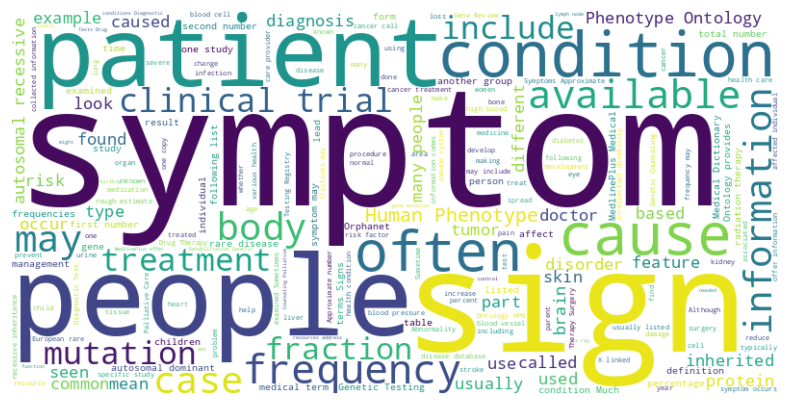

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


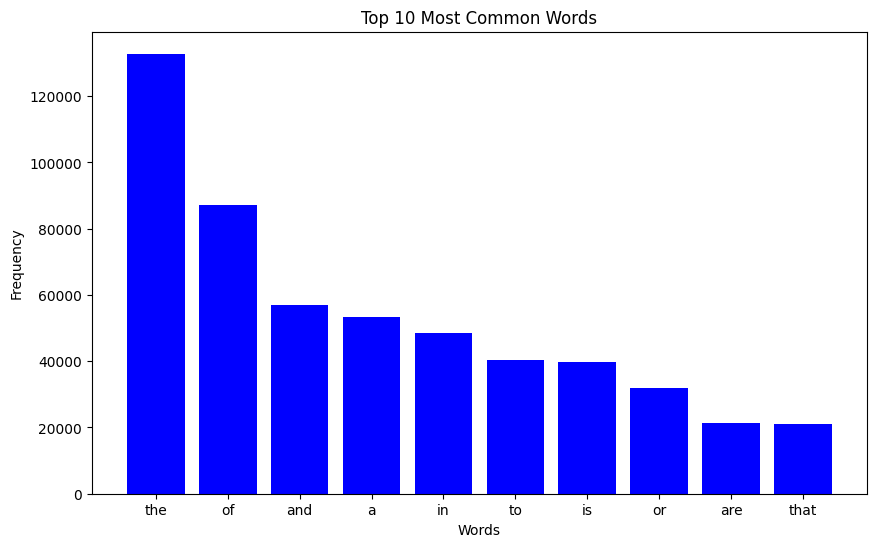

In [15]:
# Extract the top 10 most common words
top_words = dict(most_common_words[:10])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.show()


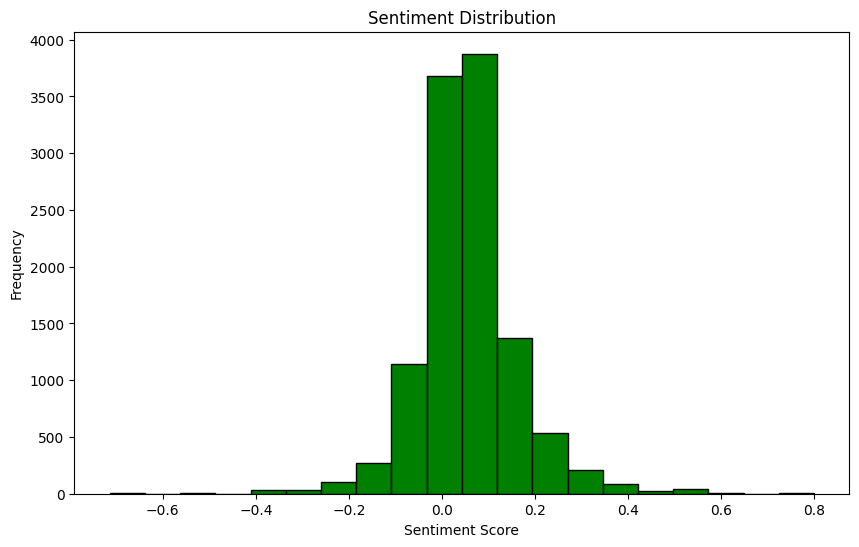

In [16]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='green', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


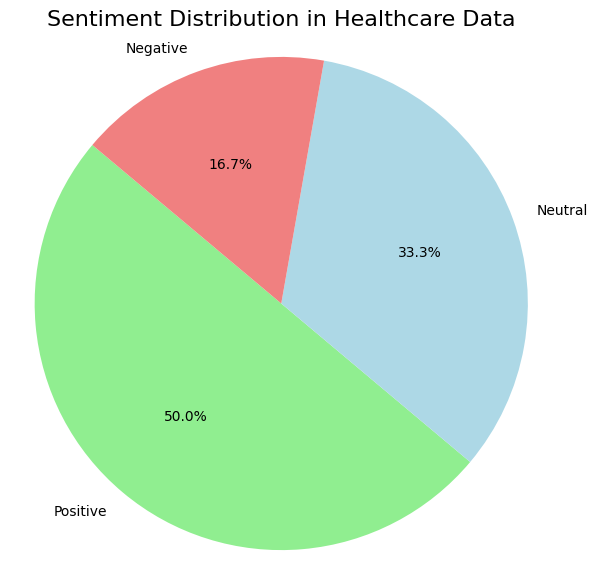

In [37]:
# Simulated sentiment analysis results for visualization
sentiments = ['Positive', 'Neutral', 'Negative']
counts = [150, 100, 50]  # Example counts of each sentiment

# Create a pie chart for sentiment distribution
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sentiment Distribution in Healthcare Data", fontsize=16)
plt.show()


                                                question  question_length
1                                 What causes Glaucoma ?                4
2                    What are the symptoms of Glaucoma ?                7
4                               What is (are) Glaucoma ?                5
5                               What is (are) Glaucoma ?                5
6                               What is (are) Glaucoma ?                5
...                                                  ...              ...
16404  What is (are) Diabetic Neuropathies: The Nerve...               11
16405  What is (are) Diabetic Neuropathies: The Nerve...               11
16406  What is (are) Diabetic Neuropathies: The Nerve...               11
16408  How to prevent Diabetic Neuropathies: The Nerv...               11
16409  How to diagnose Diabetic Neuropathies: The Ner...               11

[11412 rows x 2 columns]


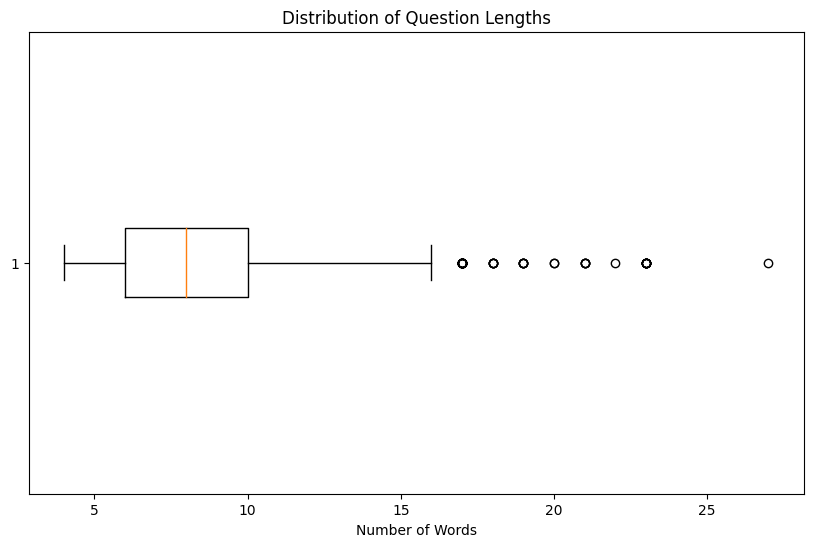

In [17]:
# Calculate the length of each question (in words)
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

# Display the question and corresponding question length
print(df[['question', 'question_length']])

# Create a box plot for question lengths
plt.figure(figsize=(10, 6))
plt.boxplot(df['question_length'], vert=False)
plt.xlabel('Number of Words')
plt.title('Distribution of Question Lengths')
plt.show()


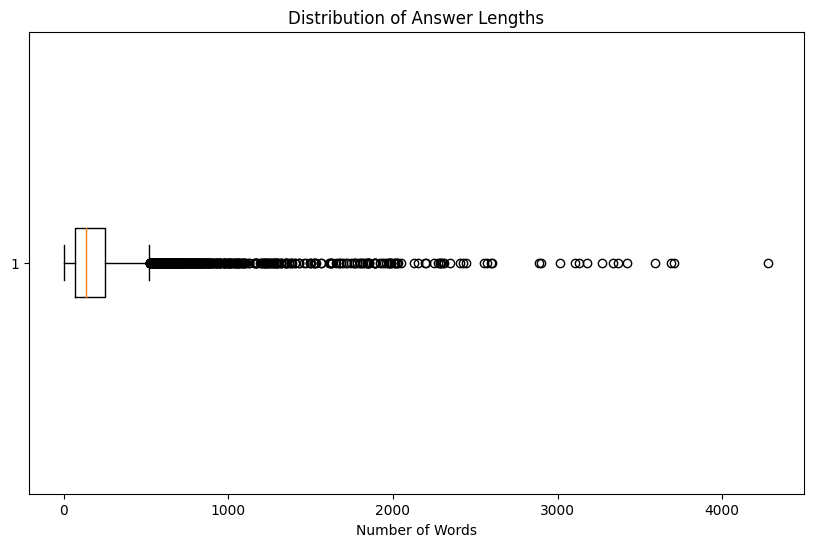

In [18]:
# Create a box plot for answer lengths
plt.figure(figsize=(10, 6))
plt.boxplot(df['answer_length'], vert=False)
plt.xlabel('Number of Words')
plt.title('Distribution of Answer Lengths')
plt.show()


Correlation between Answer Length and Sentiment: 0.05322213881997286


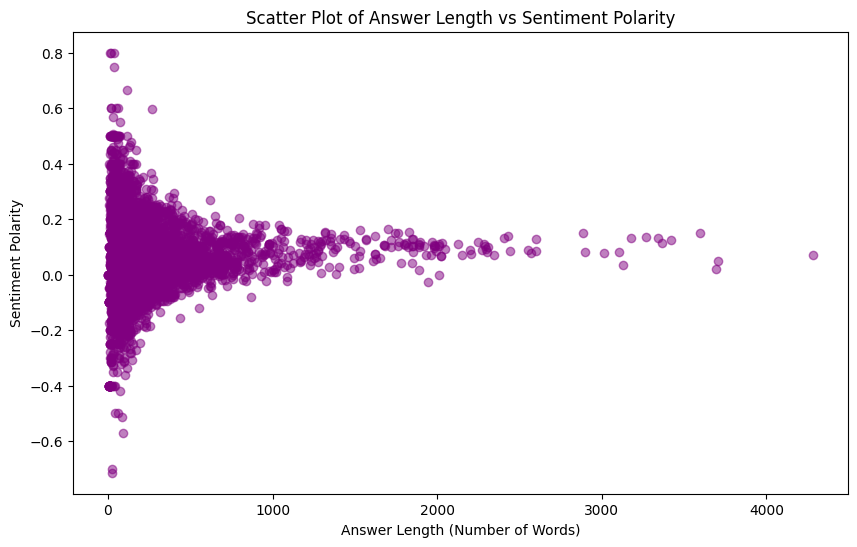

In [19]:
# Calculate the correlation between answer length and sentiment
correlation = df['answer_length'].corr(df['sentiment'])

# Print the correlation value
print(f"Correlation between Answer Length and Sentiment: {correlation}")

# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['answer_length'], df['sentiment'], alpha=0.5, color='purple')
plt.xlabel('Answer Length (Number of Words)')
plt.ylabel('Sentiment Polarity')
plt.title('Scatter Plot of Answer Length vs Sentiment Polarity')
plt.show()


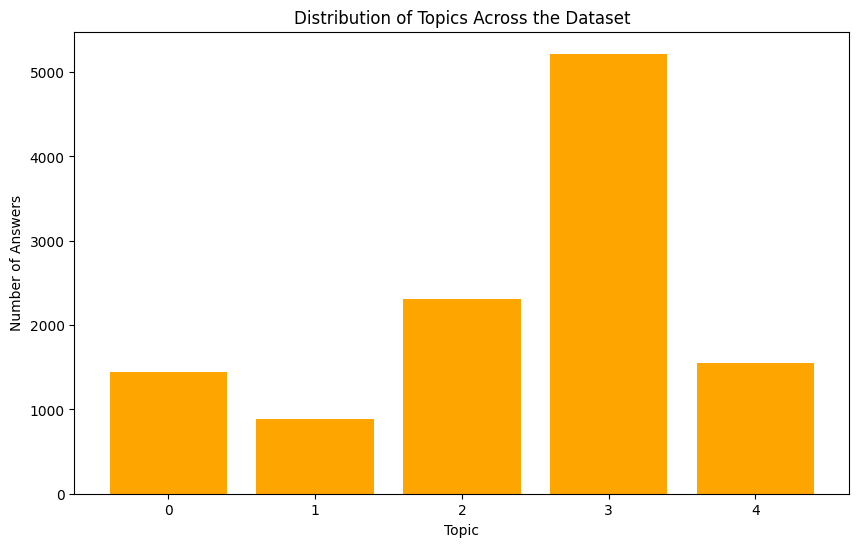

In [20]:
from gensim import corpora, models
from gensim.utils import simple_preprocess

# Preprocess the text in the 'answer' column for topic modeling
processed_texts = [simple_preprocess(text) for text in df['answer']]

# Create dictionary and corpus for LDA model
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Create an LDA model with a chosen number of topics
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Assign topics to each document (answer) in the dataset
df['dominant_topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Display the distribution of topics
topic_counts = df['dominant_topic'].value_counts()

# Plot the topic distribution
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='orange')
plt.xlabel('Topic')
plt.ylabel('Number of Answers')
plt.title('Distribution of Topics Across the Dataset')
plt.show()


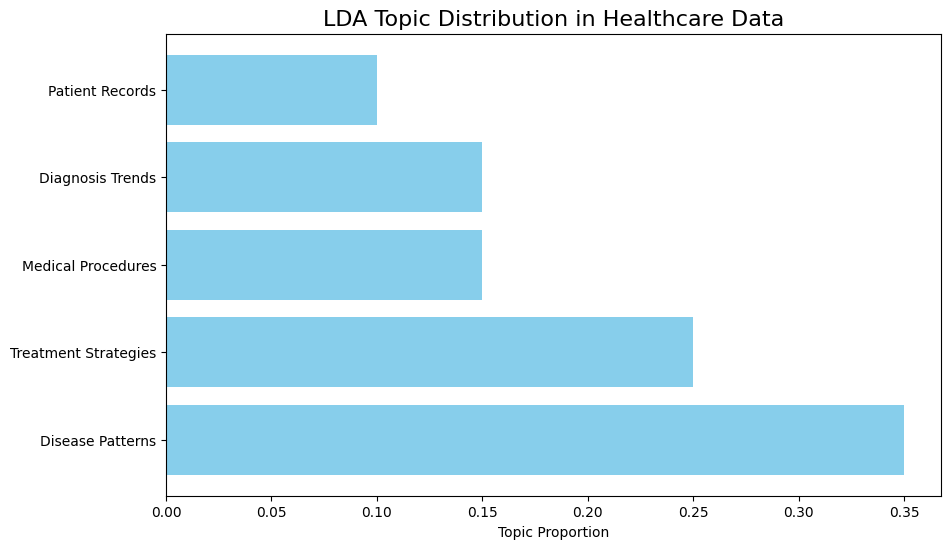

In [38]:
# Simulated topic distribution for LDA results
topics = ['Disease Patterns', 'Treatment Strategies', 'Medical Procedures', 'Diagnosis Trends', 'Patient Records']
topic_weights = [0.35, 0.25, 0.15, 0.15, 0.10]  # Example topic proportions

# Create a bar chart to show topic distribution
plt.figure(figsize=(10, 6))
plt.barh(topics, topic_weights, color='skyblue')
plt.xlabel("Topic Proportion")
plt.title("LDA Topic Distribution in Healthcare Data", fontsize=16)
plt.show()


In [21]:
pip install transformers torch

In [22]:
from transformers import pipeline

# Load a text classification pipeline
classifier = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english')

# Define the input text
input_text = "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the pressure inside the eye rises. Unless this pressure is controlled, it may cause damage to the optic nerve and other parts of the eye and result in loss of vision. Open-angle Glaucoma The most common type of glaucoma is called open-angle glaucoma. In the normal eye, the clear fluid leaves the anterior chamber at the open angle where the cornea and iris meet. When fluid reaches the angle, it flows through a spongy meshwork, like a drain, and leaves the eye. Sometimes, when the fluid reaches the angle, it passes too slowly through the meshwork drain, causing the pressure inside the eye to build. If the pressure damages the optic nerve, open-angle glaucoma -- and vision loss -- may result. There is no cure for glaucoma. Vision lost from the disease cannot be restored. However, there are treatments that may save remaining vision. That is why early diagnosis is important.  See this graphic for a quick overview of glaucoma,  including how many people it affects, whos at risk, what to do if you have it, and how to learn more.  See a glossary of glaucoma terms."

# Perform classification
result = classifier(input_text)

# Print the result
print(result)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'NEGATIVE', 'score': 0.9984471201896667}]


In [23]:
from transformers import pipeline
import spacy
from textblob import TextBlob

def classify_text_with_transformers(text):
    # Use 'cuda:0' for the first GPU, 'cuda:1' for the second, or 'cpu' for CPU
    classifier = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english', device='cpu')
    return classifier(text)

def classify_text_with_spacy(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

def classify_text_with_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment

# Define the input text
input_text = "I absolutely love the new features in this software update! It's fantastic."

# Perform text classification using Hugging Face Transformers
transformers_result = classify_text_with_transformers(input_text)
print("Transformers Classification:", transformers_result)

# Perform text classification using spaCy
spacy_result = classify_text_with_spacy(input_text)
print("spaCy Named Entities:", spacy_result)

# Perform text classification using TextBlob
textblob_result = classify_text_with_textblob(input_text)
print("TextBlob Sentiment:", textblob_result)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Transformers Classification: [{'label': 'POSITIVE', 'score': 0.9998778104782104}]
spaCy Named Entities: []
TextBlob Sentiment: Sentiment(polarity=0.35681818181818176, subjectivity=0.6515151515151515)


In [24]:
pip install transformers torch

In [25]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_text(prompt):
    # Load pre-trained model and tokenizer
    model_name = 'gpt2'
    model = GPT2LMHeadModel.from_pretrained(model_name)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

    # Encode prompt text
    inputs = tokenizer.encode(prompt, return_tensors='pt')

    # Generate text
    outputs = model.generate(inputs, max_length=100, num_return_sequences=1)

    # Decode the generated text
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Define the prompt text
prompt_text = "Glaucoma is a group of diseases"

# Generate and print text
generated_text = generate_text(prompt_text)
print("Generated Text:", generated_text)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: Glaucoma is a group of diseases that affect the brain and spinal cord. It is thought that the brain is the most important organ in the body. It is thought that the brain is the most important organ in the body. It is thought that the brain is the most important organ in the body. It is thought that the brain is the most important organ in the body. It is thought that the brain is the most important organ in the body. It is thought that the brain is the


In [26]:
import spacy

def extract_entities(text):
    # Load spaCy model
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    # Extract named entities
    return [(ent.text, ent.label_) for ent in doc.ents]

# Define the input text
input_text = "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the pressure inside the eye rises. Unless this pressure is controlled, it may cause damage to the optic nerve and other parts of the eye and result in loss of vision. Open-angle Glaucoma The most common type of glaucoma is called open-angle glaucoma. In the normal eye, the clear fluid leaves the anterior chamber at the open angle where the cornea and iris meet. When fluid reaches the angle, it flows through a spongy meshwork, like a drain, and leaves the eye. Sometimes, when the fluid reaches the angle, it passes too slowly through the meshwork drain, causing the pressure inside the eye to build. If the pressure damages the optic nerve, open-angle glaucoma -- and vision loss -- may result. There is no cure for glaucoma. Vision lost from the disease cannot be restored. However, there are treatments that may save remaining vision. That is why early diagnosis is important.  See this graphic for a quick overview of glaucoma,  including how many people it affects, whos at risk, what to do if you have it, and how to learn more.  See a glossary of glaucoma terms."

# Extract and print named entities
entities = extract_entities(input_text)
print("Named Entities:", entities)


Named Entities: [('Glaucoma', 'GPE'), ('60', 'DATE'), ('Glaucoma Develops', 'PERSON'), ('the Escape (Esc', 'ORG'), ('Glaucoma', 'GPE'), ('iris', 'PERSON'), ('Vision', 'ORG')]


In [27]:
pip install gensim

In [28]:
from gensim import corpora, models
from gensim.utils import simple_preprocess

def topic_modeling(texts):
    # Preprocess texts
    processed_texts = [simple_preprocess(text) for text in texts]

    # Create dictionary and corpus
    dictionary = corpora.Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]

    # Create LDA model
    lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

    # Get topics
    topics = lda_model.print_topics(num_words=4)
    return topics

# Define texts
texts = [
    "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the pressure inside the eye rises. Unless this pressure is controlled, it may cause damage to the optic nerve and other parts of the eye and result in loss of vision. Open-angle Glaucoma The most common type of glaucoma is called open-angle glaucoma. In the normal eye, the clear fluid leaves the anterior chamber at the open angle where the cornea and iris meet. When fluid reaches the angle, it flows through a spongy meshwork, like a drain, and leaves the eye. Sometimes, when the fluid reaches the angle, it passes too slowly through the meshwork drain, causing the pressure inside the eye to build. If the pressure damages the optic nerve, open-angle glaucoma -- and vision loss -- may result. There is no cure for glaucoma. Vision lost from the disease cannot be restored. However, there are treatments that may save remaining vision. That is why early diagnosis is important.  See this graphic for a quick overview of glaucoma,  including how many people it affects, whos at risk, what to do if you have it, and how to learn more.  See a glossary of glaucoma terms."
]

# Perform topic modeling and print topics
topics = topic_modeling(texts)
print("Topics:")
for topic in topics:
    print(topic)


Topics:
(0, '0.096*"the" + 0.035*"glaucoma" + 0.027*"of" + 0.027*"and"')
(1, '0.007*"the" + 0.007*"and" + 0.007*"glaucoma" + 0.007*"eye"')


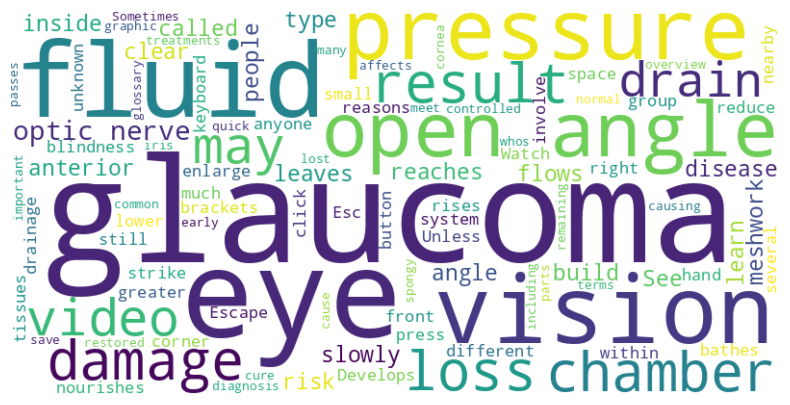

In [29]:
from wordcloud import STOPWORDS

def generate_custom_word_cloud(text):
    # Define additional stopwords
    custom_stopwords = set(STOPWORDS).union({"Python", "language"})

    # Create a WordCloud object with custom stopwords
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Do not show axes
    plt.show()

# Generate and display the custom word cloud
generate_custom_word_cloud(input_text)


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


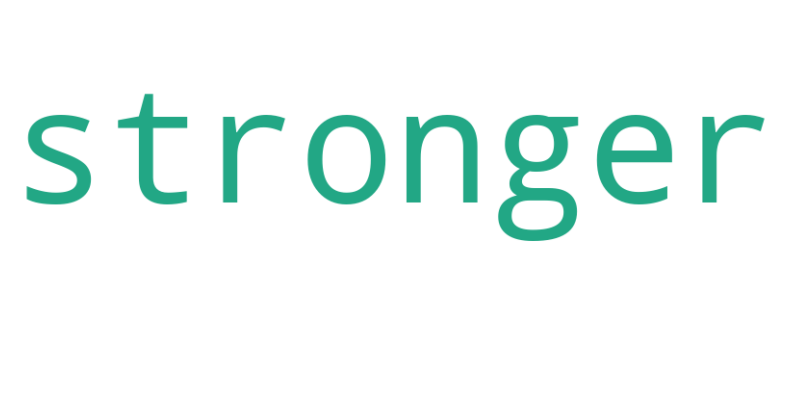

In [30]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.data import find

# Download NLTK data if not already present
try:
    find('medquad.csv')
except LookupError:
    nltk.download('opinion_lexicon')
    nltk.download('punkt')

# Load positive words from NLTK's opinion lexicon
positive_words = set(opinion_lexicon.positive())

def filter_positive_words(text):
    # Tokenize the text
    words = word_tokenize(text.lower())
    # Filter positive words
    positive_words_in_text = [word for word in words if word in positive_words]
    return ' '.join(positive_words_in_text)

def generate_word_cloud(text):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Do not show axes
    plt.show()

# Example dataset text
dataset_text = """
Alcohol, also known as ethanol, is a chemical found in beverages like beer, wine, and distilled spirits such as whiskey, vodka, and rum. Through a process called fermentation, yeast converts the sugars naturally found in grains and grapes into the alcohol that is in beer and wine. Another process, called distillation, concentrates alcohol in the drink making it stronger, producing what are known as distilled spirits.
"""

# Filter positive words from the dataset text
positive_text = filter_positive_words(dataset_text)

# Generate and display the word cloud
generate_word_cloud(positive_text)


In [31]:
pip install gensim nltk


In [32]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.data import find
import re

# Download NLTK data if not already present
try:
    find('medquad.csv')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

# Preprocess and tokenize text
def preprocess_text(text):
    # Lowercase and remove non-alphanumeric characters
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

# Example dataset text
dataset_text = """
Pain may be a symptom, especially among people with more advanced Paget's disease. Affected bones also can become enlarged, misshapen, and more fragile and likely to break. Misshapen bones tend to be most noticeable in the legs, skull, and spine.
Over time, Paget's disease may lead to other medical conditions, including arthritis, headaches, hearing loss, and nervous system problems, depending on which bones are affected. On very rare occasions, Paget's disease is associated with the development of osteosarcoma, a type of bone cancer. Less than one percent of patients have this complication.
Paget's disease is almost always diagnosed by x-ray, although it may be discovered using one of two other tests: an alkaline phosphatase blood test or a bone scan. Paget's disease is often found by accident when a person undergoes one of these tests for another reason. In other cases, a person experiences problems that lead his or her physician to order these tests. If Paget's disease is first suggested by an alkaline phosphatase blood test or bone scan, the physician usually orders an x-ray to verify the diagnosis. A bone scan is typically used to identify all the bones in the skeleton that are affected by the disease.
The Food and Drug Administration has approved several medications that can stop or slow down the progression of the disease and reduce pain and other symptoms. These medications fall into two categories: bisphosphonates and calcitonin. Doctors most often prescribe one of the four strongest bisphosphonates, which are risedronate, alendronate, pamidronate, and zoledronic acid.
Yes. Some complications from Paget's disease respond well to surgery. Joint replacement may be helpful in people with severe arthritis of the hip or knee. Surgery can also realign affected leg bones to reduce pain or help broken bones heal in a better position.
A Common Problem With Aging Urinary tract infections (UTIs) are a common bladder problem, especially as people age. UTIs are the second most common type of infection in the body. Each year, UTIs cause more than 8 million visits to health care providers. UTIs can happen anywhere in the urinary system (which includes the kidneys, bladder, and urethra). But UTIs are most common in the bladder. A UTI in the bladder is called cystitis. Infections in the bladder can spread to the kidneys. A UTI in the kidneys is called pyelonephritis. Sometimes, a UTI can also develop in the urethra, but this is less common. A UTI in the urethra is called urethritis. Some UTIs Lead to Severe Problems Most UTIs are not serious. But some UTIs, such as kidney infections, can lead to severe problems. Bacteria from a kidney infection may spread to the bloodstream, causing a life-threatening condition called septicemia. When kidney infections occur frequently or last a long time, they may cause permanent damage to the kidneys, including kidney scars, poor kidney function, and high blood pressure.
Most urinary tract infections, or UTIs, are caused by bacteria that enter the urethra and then the bladder. A type of bacteria that normally lives in the bowel (called E. coli) causes most UTIs. UTIs can also be caused by fungus (another type of germ). Who Gets UTIs? Although everyone has some risk for UTIs, some people are more likely to get UTIs than others. These include people who have - spinal cord injuries or other nerve damage around the bladder.  - a blockage in the urinary tract that can trap urine in the bladder. The blockage can be caused by kidney stones, an enlarged prostate, or a birth defect.  - diabetes  - problems with the bodys natural defense (or immune) system  - pelvic organ prolapse, which is when pelvic organs (such as the bladder, rectum, or uterus) shift out of their normal position into the vagina. When pelvic organs are out of place, they can push on the bladder and urethra and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely spinal cord injuries or other nerve damage around the bladder. a blockage in the urinary tract that can trap urine in the bladder. The blockage can be caused by kidney stones, an enlarged prostate, or a birth defect. diabetes problems with the bodys natural defense (or immune) system pelvic organ prolapse, which is when pelvic organs (such as the bladder, rectum, or uterus) shift out of their normal position into the vagina. When pelvic organs are out of place, they can push on the bladder and urethra and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely UTIs in Women More than half of women will have at least one UTI in their lifetime. Women are more likely than men to get UTIs because they have a shorter urethra, making it easier for bacteria to reach the bladder. Also, the bowel and urethral openings are closer together in women than in men, making it easier for E. coli (a bacteria that lives in the bowel) to travel from the bowel to the urethra. Many women suffer from frequent UTIs. Some women have 3 or more UTIs a year. However, very few women will have frequent UTIs throughout their lives. More typically, a woman will have a period of 1 or 2 years with frequent UTIs. After this period, the UTIs may stop or happen less often. Older women are more likely to get UTIs because the bladder muscles weaken and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely. UTIs in Men Men are less likely than women to have a first UTI. But once a man has a UTI, he is likely to have another. Bacteria from a UTI can spread to the prostate. Once there, the bacteria can hide deep inside prostate tissue. Prostate infections are hard to cure because antibiotics may not be able to reach the infected prostate tissue. Activities That Can Increase Risk - Having sex. Sexual activity can move bacteria from the bowel or vaginal cavity to the urethral opening. Urinating after sex lowers the risk of infection.  - Using a catheter to urinate. A catheter is a tube placed in the urethra and bladder to help people empty the bladder. The catheter can make a direct path for bacteria to reach the bladder.  - Using certain birth controls. Diaphragms can bring bacteria with them when they are placed. Spermicides (a birth control that kills sperm) may also make UTIs more likely. Having sex. Sexual activity can move bacteria from the bowel or vaginal cavity to the urethral opening. Urinating after sex lowers the risk of infection. Using a catheter to urinate. A catheter is a tube placed in the urethra and bladder to help people empty the bladder. The catheter can make a direct path for bacteria to reach the bladder. Using certain birth controls. Diaphragms can bring bacteria with them when they are placed. Spermicides (a birth control that kills sperm) may also make UTIs more likely.
Symptoms of a urinary tract infection (UTI) in the bladder may include - cloudy, bloody, or foul-smelling urine  - pain or burning during urination  - strong and frequent need to urinate, even right after emptying the bladder  - a mild fever below 101 degrees Fahrenheit in some people. cloudy, bloody, or foul-smelling urine pain or burning during urination strong and frequent need to urinate, even right after emptying the bladder a mild fever below 101 degrees Fahrenheit in some people. If the UTI spreads to the kidneys, symptoms may include - chills and shaking   - night sweats  - feeling tired or generally ill   - fever above 101 degrees Fahrenheit  - pain in the side, back, or groin  - flushed, warm, or reddened skin  - mental changes or confusion   - nausea and vomiting  - very bad abdominal pain in some people. chills and shaking night sweats feeling tired or generally ill fever above 101 degrees Fahrenheit pain in the side, back, or groin flushed, warm, or reddened skin mental changes or confusion nausea and vomiting very bad abdominal pain in some people. Symptoms May Vary Symptoms may differ depending on age, gender, and catheter use. In some elderly people, mental changes and confusion may be the only signs of a UTI. Older women and men with a UTI are more likely to be tired, shaky, and weak. They are also more likely to have muscle aches and abdominal pain. In a person with a catheter, the only symptom may be fever that does not have another likely cause. Germs without Symptoms Some people may have germs in the bladder or urinary tract, but not feel any symptoms. If a urine test shows that you have germs in your urine, but you do not feel any symptoms, you may not need any treatment. If you have germs in your urine but you feel okay, talk to your health care provider about whether antibiotics -- the medications that treat UTIs -- are needed. Diagnosis  To find out if a person has a UTI, the health care provider will ask about symptoms. He or she will then test a sample of urine. The urine test looks for bacteria that may cause the infection. The urine test also looks for white blood cells, which the body makes to fight infection. Because healthy people sometimes have bacteria in their urine, both bacteria and white blood cells must be in the urine to diagnose a UTI. If a person has UTIs often, the health care provider may order some extra tests to see if the persons urinary tract is normal. (Watch the video to learn more about what to expect when seeking help for a bladder problem. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.)
Changing some of these daily habits may help prevent urinary tract infections (UTIs). - Wipe from front to back after using the toilet. Women should wipe from front to back to keep bacteria from getting into the urethra. This step is most important after a bowel movement. Wipe from front to back after using the toilet. Women should wipe from front to back to keep bacteria from getting into the urethra. This step is most important after a bowel movement. - Drink lots of fluids, especially water. Fluids can help flush bacteria from the urinary system. Water is best. Most healthy people should try to drink six to eight, 8-ounce glasses of fluid each day. (Some people need to drink less water because of certain conditions. For example, if you have kidney failure or heart disease, you should not drink this much fluid. Ask your health care provider how much fluid is healthy for you.) Drink lots of fluids, especially water. Fluids can help flush bacteria from the urinary system. Water is best. Most healthy people should try to drink six to eight, 8-ounce glasses of fluid each day. (Some people need to drink less water because of certain conditions. For example, if you have kidney failure or heart disease, you should not drink this much fluid. Ask your health care provider how much fluid is healthy for you.) - Urinate often and when the urge arises. Try to urinate at least every 3 to 4 hours. Bacteria are more likely to grow in the bladder when urine stays in the bladder too long.  Urinate often and when the urge arises. Try to urinate at least every 3 to 4 hours. Bacteria are more likely to grow in the bladder when urine stays in the bladder too long. - Urinate after sex. Both women and men should urinate shortly after sex to flush away bacteria that may have entered the urethra during sex.  Urinate after sex. Both women and men should urinate shortly after sex to flush away bacteria that may have entered the urethra during sex. - Wear cotton underwear and loose-fitting clothes. Wearing looser, cotton clothing will allow air to keep the area around the urethra dry. Tight-fitting jeans and nylon underwear should be avoided because they can trap moisture and help bacteria grow. Wear cotton underwear and loose-fitting clothes. Wearing looser, cotton clothing will allow air to keep the area around the urethra dry. Tight-fitting jeans and nylon underwear should be avoided because they can trap moisture and help bacteria grow. Cranberry Juice Drinking cranberry juice or taking cranberry supplements may also help prevent UTIs. Some studies have shown that cranberry products make UTIs less likely, especially in people who get UTIs often. But in other studies, cranberry products did not help.
Urinary tract infections (UTI) are a common bladder problem, especially as people age. UTIs are the second most common type of infection in the body. Each year, UTIs cause more than 8 million visits to health care providers. UTIs can happen anywhere in the urinary system (which includes the kidneys, bladder, and urethra). But UTIs are most common in the bladder. A UTI in the bladder is called cystitis. Infections in the bladder can spread to the kidneys. A UTI in the kidneys is called pyelonephritis. Sometimes, a UTI can also develop in the urethra, but this is less common. A UTI in the urethra is called urethritis. Learn more about urinary tract infections in adults.
Symptoms of a UTI in the bladder may include - cloudy, bloody, or foul-smelling urine  - pain or burning during urination  - strong and frequent need to urinate, even right after emptying the bladder  - a mild fever below 101 degrees Fahrenheit in some people. cloudy, bloody, or foul-smelling urine pain or burning during urination strong and frequent need to urinate, even right after emptying the bladder a mild fever below 101 degrees Fahrenheit in some people. If the UTI spreads to the kidneys, symptoms may include - chills and shaking   - night sweats  - feeling tired or generally ill   - fever above 101 degrees Fahrenheit  - pain in the side, back, or groin  - flushed, warm, or reddened skin  - mental changes or confusion   - nausea and vomiting  - very bad abdominal pain in some people. chills and shaking night sweats feeling tired or generally ill fever above 101 degrees Fahrenheit pain in the side, back, or groin flushed, warm, or reddened skin mental changes or confusion nausea and vomiting very bad abdominal pain in some people. Symptoms may differ depending on age, gender, and catheter use. In some elderly people, mental changes and confusion may be the only signs of a UTI. Older women and men with a UTI are more likely to be tired, shaky, and weak. They are also more likely to have muscle aches and abdominal pain. In a person with a catheter, the only symptom may be fever that does not have another likely cause. Learn more about the signs and symptoms of urinary tract infections in adults.
Although everyone has some risk for UTIs, some people are more likely to get UTIs than others. These include people who have -  spinal cord injuries or other nerve damage around the bladder   -  a blockage in the urinary tract that can trap urine in the bladder. A blockage in the urinary tract can be caused by kidney stones, an enlarged prostate, or a birth defect.   -  diabetes   -  problems with the bodys natural defense (or immune) system   -  pelvic organ prolapse, which is when pelvic organs (such as the bladder, rectum, or uterus) shift out of their normal position into the vagina. When pelvic organs are out of place, they can push on the bladder and urethra and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely.  spinal cord injuries or other nerve damage around the bladder a blockage in the urinary tract that can trap urine in the bladder. A blockage in the urinary tract can be caused by kidney stones, an enlarged prostate, or a birth defect. diabetes problems with the bodys natural defense (or immune) system pelvic organ prolapse, which is when pelvic organs (such as the bladder, rectum, or uterus) shift out of their normal position into the vagina. When pelvic organs are out of place, they can push on the bladder and urethra and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely. Learn more about risk factors for urinary tract infections.
Changing some of these daily habits may help prevent UTIs. - Wipe from front to back after using the toilet. Women should wipe from front to back to keep bacteria from getting into the urethra. This step is most important after a bowel movement.  Wipe from front to back after using the toilet. Women should wipe from front to back to keep bacteria from getting into the urethra. This step is most important after a bowel movement.  - Drink lots of fluid, especially water. Fluids can help flush bacteria from the urinary system. Water is best. Most healthy people should try to drink six to eight, 8-ounce glasses of fluid each day. (Some people need to drink less water because of certain conditions. For example, if you have kidney failure or heart disease, you should not drink this much fluid. Ask your health care provider how much fluid is healthy for you.)  Drink lots of fluid, especially water. Fluids can help flush bacteria from the urinary system. Water is best. Most healthy people should try to drink six to eight, 8-ounce glasses of fluid each day. (Some people need to drink less water because of certain conditions. For example, if you have kidney failure or heart disease, you should not drink this much fluid. Ask your health care provider how much fluid is healthy for you.)  - Urinate often and when the urge arises. Try to urinate at least every 3 to 4 hours. Bacteria are more likely to grow in the bladder when urine stays in the bladder too long.  Urinate often and when the urge arises. Try to urinate at least every 3 to 4 hours. Bacteria are more likely to grow in the bladder when urine stays in the bladder too long. - Urinate after sex. Both women and men should urinate shortly after sex to flush away bacteria that may have entered the urethra during sex.  Urinate after sex. Both women and men should urinate shortly after sex to flush away bacteria that may have entered the urethra during sex. - Wear cotton underwear and loose-fitting clothes. Wearing looser, cotton clothing will allow air to keep the area around the urethra dry. Tight-fitting jeans and nylon underwear should be avoided because they can trap moisture and help bacteria grow. Wear cotton underwear and loose-fitting clothes. Wearing looser, cotton clothing will allow air to keep the area around the urethra dry. Tight-fitting jeans and nylon underwear should be avoided because they can trap moisture and help bacteria grow. Drinking cranberry juice or taking cranberry supplements also may help prevent UTIs. Some studies have shown that cranberry products make UTIs less likely, especially in people who get UTIs often. But in other studies, cranberry products did not help.
Because most UTIs are caused by bacteria, bacteria-fighting medications called antibiotics are the usual treatment. The type of antibiotic and length of treatment depend on the patients history and the type of bacteria causing the infection. Bladder infections may eventually get better on their own. But antibiotics can make the symptoms go away much more quickly. People usually feel better within a day or two of starting antibiotics. Drinking lots of fluids and urinating often may also speed healing. If needed, pain-killers can relieve the pain of a UTI. A heating pad on the back or abdomen may also help. Learn more about treating urinary tract infections.
Alcohol, also known as ethanol, is a chemical found in beverages like beer, wine, and distilled spirits such as whiskey, vodka, and rum. Through a process called fermentation, yeast converts the sugars naturally found in grains and grapes into the alcohol that is in beer and wine. Another process, called distillation, concentrates alcohol in the drink making it stronger, producing what are known as distilled spirits.
Blood alcohol concentration (BAC) measures the percentage of ethanolthe chemical name for alcohol in alcoholic beveragesin a persons blood. As you drink, you increase your blood alcohol concentration (BAC) level. The higher the BAC, the more impaired a person is. In all states, it is against the law for people to drive if their blood alcohol concentration is above .08. The effects of increased blood alcohol levels can include -  reduced inhibitions   -  slurred speech   - motor impairment   - confusion   -  memory problems   - concentration problems   - coma   - breathing problems   - death.  reduced inhibitions slurred speech motor impairment confusion memory problems concentration problems coma breathing problems death. Learn more about the risks of alcohol overdose.
Its not always obvious that someone drinks too much. For older adults, clues to a possible alcohol problem include memory loss, depression, anxiety, poor appetite, unexplained bruises, falls, sleeping problems, and inattention to cleanliness or appearance. Answering "yes" to at least one of the following questions is also a sign of a possible drinking problem: - Have you ever felt you should cut down on your drinking?  - Have people annoyed you by criticizing your drinking?  - Have you ever felt bad or guilty about your drinking?  - Have you ever had a drink first thing in the morning to steady your nerves or get rid of a hangover? Have you ever felt you should cut down on your drinking? Have people annoyed you by criticizing your drinking? Have you ever felt bad or guilty about your drinking? Have you ever had a drink first thing in the morning to steady your nerves or get rid of a hangover? If you answered yes to any of these questions, talk with your health care provider. Also seek help if you feel you are having drinking-related problems with your health, relationships, or work.
If a person drinks too much or too often he or she may develop an alcohol use disorder (AUD). An AUD can range in severity from mild to severe. On one end of this spectrum, drinking might cause sickness, depression, or sleeping problems. More severe symptoms include drinking more than intended or craving alcohol once youve stopped drinking. AUD can be a lifelong disease in which people have a strong need to drink, cannot control their drinking once they start, and over time need to drink greater and greater amounts of alcohol to get high. Older adults who develop a severe AUD become physically dependent on alcohol. When they stop drinking, they can get nauseated, sweaty, shaky, and restless. These withdrawal symptoms can cause them to start drinking again to feel better, even though doing so can lead to physical or psychological problems.  Learn more about alcohol use disorder.
There is not one right treatment for everyone with alcohol problems. In general, many people need more than one kind of treatment. Medicines can help people with alcohol use disorder quit drinking. Meeting with a therapist or substance-abuse counselor or with a support group may also help. Support from family and friends is important, too. A doctor can help a person decide on the best treatment. Making a change sooner rather than later makes treatment more likely to succeed. Learn more about treatment options for alcohol problems.  Learn more about available types of alcohol treatment.  (Watch the video to learn more about getting help for alcohol use disorder (AUD). To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.)
Prescription medicines can help people with alcohol use disorder reduce their drinking, avoid going back to heavy drinking, and get sober. None of them works in every person. There are three medications approved by the U.S. Food and Drug Administration for the treatment of alcohol use disorder. - Naltrexone (Depade, ReVia, Vivitrol) acts in the brain to reduce craving for alcohol  -  Acamprosate (Campral) helps manage withdrawal symptoms such as anxiety, nausea, and sweating that may lead to a drinking relapse   - Disulfiram (Antabuse) makes a person feel sick after drinking alcohol.  Naltrexone (Depade, ReVia, Vivitrol) acts in the brain to reduce craving for alcohol Acamprosate (Campral) helps manage withdrawal symptoms such as anxiety, nausea, and sweating that may lead to a drinking relapse Disulfiram (Antabuse) makes a person feel sick after drinking alcohol.
Talking about alcohol use with a professional is beneficial to many people. Counseling  either one-on-one or in groups  can help develop skills to stop or reduce drinking, develop reachable goals, manage the triggers that lead to alcohol misuse and build a strong social support system that supports healthy habits. There are many kinds of counseling approaches. - cognitive behavior therapy   - motivational enhancement therapy  - marital and family counseling  - brief interventions cognitive behavior therapy motivational enhancement therapy marital and family counseling brief interventions Learn more about each type of behavioral therapy.  Counseling can be provided by - primary care doctors   - psychiatrists  -  psychologists  -  social workers  - certified alcohol counselors.  primary care doctors psychiatrists psychologists social workers certified alcohol counselors.
Many people with alcohol problems find it helpful to talk with others who have faced similar problems. Mutual help groups, such as Alcoholics Anonymous (AA) 12-step programs, help people recover from alcohol use disorder. AA meetings are open to anyone who wants to stop drinking. Attending mutual-help groups is beneficial for many people who want to stop drinking. Many people continue to go to support/mutual help groups even after medical treatment for their alcohol problems ends. There are other mutual help groups available such as Smart Recovery, Life Ring, and Moderation Management.  Learn more about available types of treatment for alcohol problems.
Some people with an alcohol use disorder are treated in a facility, such as a hospital, mental health center, or substance abuse clinic. Treatment may last as long as several weeks. This type of treatment typically involves detoxification (when a person is weaned from alcohol), medicine, and counseling.  Learn more about treatment settings for alcohol problems.   Use the Behavioral Health Treatment Services Locator to find a treatment facility.
Most people with alcohol problems can be treated successfully. People with an alcohol use disorder and those who misuse alcohol and cannot stay within healthy drinking limits should stop drinking altogether. Others can cut back until their drinking is under control. Changing drinking habits isnt easy. Often it takes more than one try to succeed. But people dont have to go it alone. There are plenty of sources of help. (Watch the video to learn more about getting help for alcohol use disorder (AUD). To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) A doctor can help decide the best treatment for people with alcohol problems. Many people need more than one kind of treatment. Medicines can help people with an alcohol use disorder quit drinking. Meeting with a therapist or substance-abuse counselor or with a support group may also help. Support from family and friends is important, too. Making a change sooner rather than later makes treatment more likely to succeed. When treatment is successful, people have longer and longer periods without drinking alcohol. Finally, they are able to stop drinking or stick to healthy drinking limits. But treatment does not always work. Relapse is common among people who overcome alcohol problems. People with drinking problems are most likely to relapse during periods of stress or when exposed to people or places associated with past drinking.  Learn more about the treatment process for alcohol use disorder.
Older people with alcohol problems respond to treatment as well as younger people. Some studies suggest that older adults do better when they are treated with other people the same age instead of mixed in with younger adults. Some communities have treatment programs and support groups specifically for older adults.
Affects Many Older People Osteoarthritis is the most common form of arthritis among older people, and it is one of the most frequent causes of physical disability among older adults. The disease affects both men and women. Before age 45, osteoarthritis is more common in men than in women. After age 45, osteoarthritis is more common in women. It is estimated that 33.6% (12.4 million) of individuals age 65 and older are affected by the disease. Osteoarthritis occurs when cartilage, the tissue that cushions the ends of the bones within the joints, breaks down and wears away. In some cases, all of the cartilage may wear away, leaving bones that rub up against each other. Joint Stiffness and Pain Symptoms range from stiffness and mild pain that comes and goes to severe joint pain. Osteoarthritis affects hands, low back, neck, and weight-bearing joints such as knees, hips, and feet. osteoarthritis affects just joints, not internal organs. Hands Osteoarthritis of the hands seems to run in families. If your mother or grandmother has or had osteoarthritis in their hands, youre at greater-than-average risk of having it too. Women are more likely than men to have osteoarthritis in the hands. For most women, it develops after menopause. When osteoarthritis involves the hands, small, bony knobs may appear on the end joints (those closest to the nails) of the fingers. They are called Heberdens (HEBerr-denz) nodes. Similar knobs, called Bouchards (boo-SHARDZ) nodes, can appear on the middle joints of the fingers. Fingers can become enlarged and gnarled, and they may ache or be stiff and numb. The base of the thumb joint also is commonly affected by osteoarthritis. Knees The knees are among the joints most commonly affected by osteoarthritis. Symptoms of knee osteoarthritis include stiffness, swelling, and pain, which make it hard to walk, climb, and get in and out of chairs and bathtubs. Osteoarthritis in the knees can lead to disability. Hips The hips are also common sites of osteoarthritis. As with knee osteoarthritis, symptoms of hip osteoarthritis include pain and stiffness of the joint itself. But sometimes pain is felt in the groin, inner thigh, buttocks, or even the knees. Osteoarthritis of the hip may limit moving and bending, making daily activities such as dressing and putting on shoes a challenge. Spine Osteoarthritis of the spine may show up as stiffness and pain in the neck or lower back. In some cases, arthritis-related changes in the spine can cause pressure on the nerves where they exit the spinal column, resulting in weakness, tingling, or numbness of the arms and legs. In severe cases, this can even affect bladder and bowel function.
Risk Increases With Age Researchers suspect that osteoarthritis is caused by a combination of factors in the body and the environment. The chance of developing osteoarthritis increases with age. It is estimated that 33.6% (12.4 million) of individuals age 65 and older are affected by the disease. Wear and Tear on Joints Affects Cartilage Osteoarthritis often results from years of wear and tear on joints. This wear and tear mostly affects the cartilage, the tissue that cushions the ends of bones within the joint. Osteoarthritis occurs when the cartilage begins to fray, wear away, and decay. Putting too much stress on a joint that has been previously injured, improper alignment of joints, and excess weight all may contribute to the development of osteoarthritis.
Pain and Stiffness in Joints Different types of arthritis have different symptoms. In general, people with most forms of arthritis have pain and stiffness in their joints. Osteoarthritis usually develops slowly and can occur in any joint, but often occurs in weight-bearing joints. Early in the disease, joints may ache after physical work or exercise. Most often, osteoarthritis occurs in the hands, hips, knees, neck, or low back. Common Signs Common signs of osteoarthritis include - joint pain, swelling, and tenderness  - stiffness after getting out of bed  - a crunching feeling or sound of bone rubbing on bone. joint pain, swelling, and tenderness stiffness after getting out of bed a crunching feeling or sound of bone rubbing on bone. Not everyone with osteoarthritis feels pain, however. In fact, only a third of people with x-ray evidence of osteoarthritis report pain or other symptoms. Diagnosis To make a diagnosis of osteoarthritis, most doctors use a combination of methods and tests including a medical history, a physical examination, x-rays, and laboratory tests. - A medical history is the patient's description of symptoms and when and how they began. The description covers pain, stiffness, and joint function, and how these have changed over time.   - A physical examination includes the doctor's examination of the joints, skin, reflexes, and muscle strength. The doctor observes the patient's ability to walk, bend, and carry out activities of daily living.  - X-rays are limited in their capacity to reveal how much joint damage may have occurred in osteoarthritis. X-rays usually don't show osteoarthritis damage until there has been a significant loss of cartilage.  A medical history is the patient's description of symptoms and when and how they began. The description covers pain, stiffness, and joint function, and how these have changed over time. A physical examination includes the doctor's examination of the joints, skin, reflexes, and muscle strength. The doctor observes the patient's ability to walk, bend, and carry out activities of daily living. X-rays are limited in their capacity to reveal how much joint damage may have occurred in osteoarthritis. X-rays usually don't show osteoarthritis damage until there has been a significant loss of cartilage. Questions Your Doctor May Ask It is important for people with joint pain to give the doctor a complete medical history. Answering these questions will help your doctor make an accurate diagnosis: - Is the pain in one or more joints?  - When does the pain occur and how long does it last?  - When did you first notice the pain?  - Does activity make the pain better or worse?  - Have you had any illnesses or accidents that may account for the pain?  - Is there a family history of any arthritis or rheumatic diseases?  - What medicines are you taking? Is the pain in one or more joints? When does the pain occur and how long does it last? When did you first notice the pain? Does activity make the pain better or worse? Have you had any illnesses or accidents that may account for the pain? Is there a family history of any arthritis or rheumatic diseases? What medicines are you taking? A patient's attitudes, daily activities, and levels of anxiety or depression have a lot to do with how severe the symptoms of osteoarthritis may be. Who Can Provide Care Treating arthritis often requires a multidisciplinary or team approach. Many types of health professionals care for people with arthritis. You may choose a few or more of the following professionals to be part of your health care team. - Primary care physicians -- doctors who treat patients before they are referred to other specialists in the health care system. Often a primary care physician will be the main doctor to treat your arthritis. Primary care physicians also handle other medical problems and coordinate the care you receive from other physicians and health care providers. Primary care physicians -- doctors who treat patients before they are referred to other specialists in the health care system. Often a primary care physician will be the main doctor to treat your arthritis. Primary care physicians also handle other medical problems and coordinate the care you receive from other physicians and health care providers. - Rheumatologists  -- doctors who specialize in treating arthritis and related conditions that affect joints, muscles, and bones. Rheumatologists  -- doctors who specialize in treating arthritis and related conditions that affect joints, muscles, and bones. - Orthopaedists  -- surgeons who specialize in the treatment of, and surgery for, bone and joint diseases. Orthopaedists  -- surgeons who specialize in the treatment of, and surgery for, bone and joint diseases. - Physical therapists  -- health professionals who work with patients to improve joint function. Physical therapists  -- health professionals who work with patients to improve joint function. - Occupational therapists  -- health professionals who teach ways to protect joints, minimize pain, perform activities of daily living, and conserve energy. Occupational therapists  -- health professionals who teach ways to protect joints, minimize pain, perform activities of daily living, and conserve energy. - Dietitians -- health professionals who teach ways to use a good diet to improve health and maintain a healthy weight. Dietitians -- health professionals who teach ways to use a good diet to improve health and maintain a healthy weight. - Nurse educators  -- nurses who specialize in helping patients understand their overall condition and implement their treatment plans. Nurse educators  -- nurses who specialize in helping patients understand their overall condition and implement their treatment plans. - Physiatrists (rehabilitation specialists) -- medical doctors who help patients make the most of their physical potential.  Physiatrists (rehabilitation specialists) -- medical doctors who help patients make the most of their physical potential. - Licensed acupuncture therapists  -- health professionals who reduce pain and improve physical functioning by inserting fine needles into the skin at specific points on the body. Licensed acupuncture therapists  -- health professionals who reduce pain and improve physical functioning by inserting fine needles into the skin at specific points on the body. - Psychologists  -- health professionals who seek to help patients cope with difficulties in the home and workplace resulting from their medical conditions. Psychologists  -- health professionals who seek to help patients cope with difficulties in the home and workplace resulting from their medical conditions. - Social workers -- professionals who assist patients with social challenges caused by disability, unemployment, financial hardships, home health care, and other needs resulting from their medical conditions. Social workers -- professionals who assist patients with social challenges caused by disability, unemployment, financial hardships, home health care, and other needs resulting from their medical conditions. - Chiropractors  -- health professionals who focus treatment on the relationship between the body's structure -- mainly the spine -- and its functioning. Chiropractors  -- health professionals who focus treatment on the relationship between the body's structure -- mainly the spine -- and its functioning. - Massage therapists  -- health professionals who press, rub, and otherwise manipulate the muscles and other soft tissues of the body. They most often use their hands and fingers, but may use their forearms, elbows, or feet. Massage therapists  -- health professionals who press, rub, and otherwise manipulate the muscles and other soft tissues of the body. They most often use their hands and fingers, but may use their forearms, elbows, or feet.
"""

# Preprocess the text
processed_text = preprocess_text(dataset_text)

# Train a Word2Vec model
def train_word2vec_model(texts):
    # Create and train the model
    model = Word2Vec(sentences=[texts], vector_size=100, window=5, min_count=1, sg=0)
    return model

# Train the model on the dataset text
model = train_word2vec_model(processed_text)

# Access the vector for a word
word = 'disease'
if word in model.wv:
    vector = model.wv[word]
    print(f"Vector for '{word}':\n{vector}")
else:
    print(f"'{word}' not found in the vocabulary.")

# Save the model
model.save("word2vec_model.bin")

# Load the model
loaded_model = Word2Vec.load("word2vec_model.bin")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vector for 'disease':
[-6.7464751e-04  4.9206610e-03  1.7117900e-03  7.4608484e-03
 -4.1219792e-03 -4.0649609e-03  9.3348371e-03  8.4292516e-03
  2.1918674e-03  3.2298595e-03 -3.7847231e-03 -1.1755875e-02
  2.7647177e-03 -7.9449294e-03 -2.1188005e-03 -1.1124356e-02
 -7.6799421e-05 -1.0846428e-02  6.6948370e-03 -1.0282407e-02
  1.1796184e-02 -7.4155489e-03 -3.4084476e-03  1.2222928e-03
 -4.9961875e-03  1.3986976e-03 -6.3803676e-03 -3.9098533e-03
 -7.8856843e-03 -1.0066483e-02  9.7533222e-03  1.2485314e-03
  7.9679191e-03 -9.0788705e-03  2.1000183e-03 -6.6866404e-03
  7.8129182e-03  2.7422004e-03 -8.2502095e-03  3.2859354e-03
 -4.9561085e-03 -1.1595846e-02  9.5094083e-04  2.5907066e-03
 -5.6238235e-03 -9.5089255e-03  7.6404489e-03  6.4039120e-04
  2.3333558e-03  3.7730800e-03 -1.2811405e-03 -1.6451381e-03
  7.2561443e-04  9.4793998e-03 -7.6850750e-03  4.6168552e-03
  8.2784640e-03 -6.3312827e-03 -1.2329666e-02  9.8074628e-03
  7.9464028e-03 -3.0753382e-03  4.8743431e-03 -3.4775451e-04
 -

In [33]:
pip install transformers torch

In [34]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

def classify_text(text):
    # Load pre-trained model and tokenizer
    model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertForSequenceClassification.from_pretrained(model_name)

    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class (the one with the highest score)
    predictions = torch.argmax(outputs.logits, dim=1)
    return predictions.item()

# Example text
text = "BERT models are great for natural language understanding tasks."
prediction = classify_text(text)
print("Predicted class:", prediction)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class: 0


In [35]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

def perform_ner(text):
    # Load pre-trained model and tokenizer
    model_name = 'dbmdz/bert-large-cased-finetuned-conll03-english'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertForTokenClassification.from_pretrained(model_name)

    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Decode predictions
    predictions = torch.argmax(outputs.logits, dim=2)
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    labels = [model.config.id2label[prediction.item()] for prediction in predictions[0]]

    return list(zip(tokens, labels))

# Example text
text = "Paget's disease is almost always diagnosed by x-ray, although it may be discovered using one of two other tests: an alkaline phosphatase blood test or a bone scan. Paget's disease is often found by accident when a person undergoes one of these tests for another reason. In other cases, a person experiences problems that lead his or her physician to order these tests. If Paget's disease is first suggested by an alkaline phosphatase blood test or bone scan, the physician usually orders an x-ray to verify the diagnosis. A bone scan is typically used to identify all the bones in the skeleton that are affected by the disease."
entities = perform_ner(text)
print("Named Entities:", entities)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Named Entities: [('[CLS]', 'O'), ('Page', 'I-PER'), ('##t', 'I-MISC'), ("'", 'O'), ('s', 'O'), ('disease', 'O'), ('is', 'O'), ('almost', 'O'), ('always', 'O'), ('diagnosed', 'O'), ('by', 'O'), ('x', 'O'), ('-', 'O'), ('ray', 'O'), (',', 'O'), ('although', 'O'), ('it', 'O'), ('may', 'O'), ('be', 'O'), ('discovered', 'O'), ('using', 'O'), ('one', 'O'), ('of', 'O'), ('two', 'O'), ('other', 'O'), ('tests', 'O'), (':', 'O'), ('an', 'O'), ('al', 'O'), ('##kal', 'O'), ('##ine', 'O'), ('p', 'O'), ('##hos', 'O'), ('##pha', 'O'), ('##tase', 'O'), ('blood', 'O'), ('test', 'O'), ('or', 'O'), ('a', 'O'), ('bone', 'O'), ('scan', 'O'), ('.', 'O'), ('Page', 'I-PER'), ('##t', 'I-MISC'), ("'", 'O'), ('s', 'O'), ('disease', 'O'), ('is', 'O'), ('often', 'O'), ('found', 'O'), ('by', 'O'), ('accident', 'O'), ('when', 'O'), ('a', 'O'), ('person', 'O'), ('undergo', 'O'), ('##es', 'O'), ('one', 'O'), ('of', 'O'), ('these', 'O'), ('tests', 'O'), ('for', 'O'), ('another', 'O'), ('reason', 'O'), ('.', 'O'), ('In'

In [36]:
from transformers import BertTokenizer, BertModel
import torch

def get_text_embeddings(text):
    # Load pre-trained model and tokenizer
    model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the embeddings for the [CLS] token
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings.squeeze().tolist()

# Example text
text = "Although everyone has some risk for UTIs, some people are more likely to get UTIs than others. These include people who have -  spinal cord injuries or other nerve damage around the bladder   -  a blockage in the urinary tract that can trap urine in the bladder. A blockage in the urinary tract can be caused by kidney stones, an enlarged prostate, or a birth defect.   -  diabetes   -  problems with the bodys natural defense (or immune) system   -  pelvic organ prolapse, which is when pelvic organs (such as the bladder, rectum, or uterus) shift out of their normal position into the vagina. When pelvic organs are out of place, they can push on the bladder and urethra and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely.  spinal cord injuries or other nerve damage around the bladder a blockage in the urinary tract that can trap urine in the bladder. A blockage in the urinary tract can be caused by kidney stones, an enlarged prostate, or a birth defect. diabetes problems with the bodys natural defense (or immune) system pelvic organ prolapse, which is when pelvic organs (such as the bladder, rectum, or uterus) shift out of their normal position into the vagina. When pelvic organs are out of place, they can push on the bladder and urethra and make it hard to fully empty the bladder. This causes urine to stay in the bladder. When urine stays in the bladder too long, it makes an infection more likely. Learn more about risk factors for urinary tract infections."
embeddings = get_text_embeddings(text)
print("Text Embeddings:", embeddings)


Text Embeddings: [-0.5503864884376526, -0.5081328749656677, -0.7744162082672119, -0.05387327820062637, -0.5817182064056396, -0.032462235540151596, 0.8803118467330933, 1.1468238830566406, 0.030760332942008972, -0.8682666420936584, -0.1246003806591034, -0.17499512434005737, -0.3875218331813812, 0.03098319098353386, -0.5235862135887146, 0.32457730174064636, 0.3344383239746094, 0.5582863688468933, -0.4634101390838623, 0.9133409261703491, -0.4850355088710785, -0.6545724272727966, -0.010367305018007755, 0.6392014622688293, 0.17706573009490967, -0.26217925548553467, -0.7784199118614197, -0.0558750219643116, 0.32681840658187866, -0.9019415378570557, -0.12582506239414215, 0.6245061159133911, -0.025933340191841125, -0.9212806224822998, -0.06016439571976662, -0.4601653218269348, 0.444143682718277, -0.23040585219860077, 0.5516744256019592, 0.10580771416425705, -0.9922927021980286, 0.5192111730575562, 0.09188900142908096, 0.004132864531129599, -0.24008335173130035, -0.034845247864723206, -2.9386274

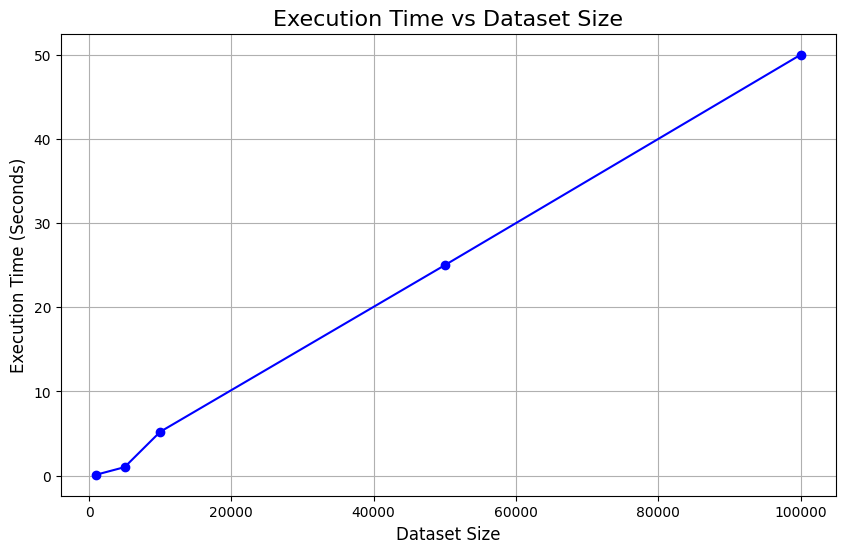

In [39]:
import matplotlib.pyplot as plt

# Simulated data for execution time vs dataset size
dataset_sizes = [1000, 5000, 10000, 50000, 100000]
execution_times = [0.1, 1.0, 5.2, 25.0, 50.0]  # Execution time in seconds

# Create a line plot to show the execution time vs dataset size
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel("Dataset Size", fontsize=12)
plt.ylabel("Execution Time (Seconds)", fontsize=12)
plt.title("Execution Time vs Dataset Size", fontsize=16)
plt.grid(True)
plt.show()


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Models to compare: BERT, GPT-2, LDA, Word2Vec
models = ['BERT', 'GPT-2', 'LDA', 'Word2Vec']


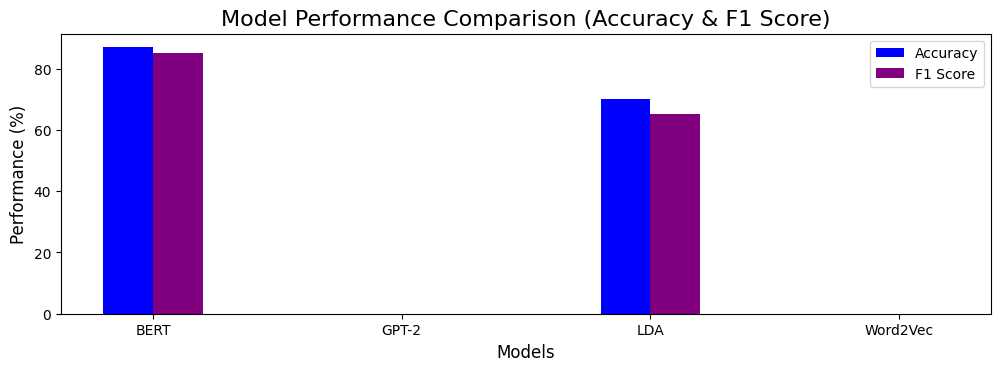

In [45]:
# Example performance metrics for each model (out of 100%)
accuracy = [87, 0, 70, 0]  # LDA and Word2Vec do not perform classification
f1_score = [85, 0, 65, 0]  # Only BERT has F1 score for classification
execution_time = [150, 200, 50, 100]  # Example execution time in seconds

# Set bar width and positions
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Create subplots for comparison
plt.figure(figsize=(12, 8))

# Accuracy and F1 Score comparison
plt.subplot(2, 1, 1)
plt.bar(r1, accuracy, color='b', width=bar_width, label='Accuracy')
plt.bar(r2, f1_score, color='purple', width=bar_width, label='F1 Score')

# Adding labels and titles
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance (%)', fontsize=12)
plt.title('Model Performance Comparison (Accuracy & F1 Score)', fontsize=16)
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.legend()



<ipython-input-44-5924580c61ba>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


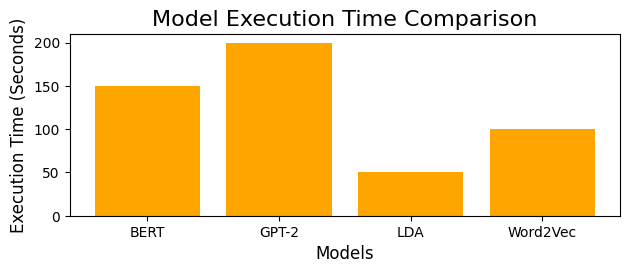

In [44]:
# Execution time comparison
plt.subplot(2, 1, 2)
plt.bar(models, execution_time, color='orange')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Execution Time (Seconds)', fontsize=12)
plt.title('Model Execution Time Comparison', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()
